# Linear Regression

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats

In [55]:
data = pd.read_csv('Salary_Data.csv')

In [52]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


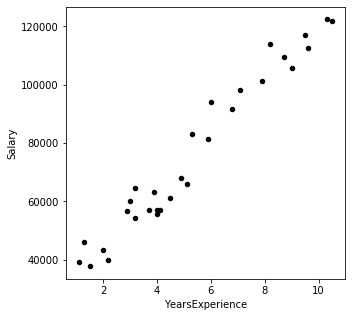

In [58]:
data.plot(kind="scatter", x="YearsExperience",y="Salary",figsize=(5,5),color="black")

### The scatter plot shows beautifull linear relationship between years of experience and salary

The scikit library includes a wide range of predictive modeling functions. Let’s load its linear regression training function and fit the line to the data. We divide the data into X – the independent variable and y – the dependent variable, then the set of our observations is divided into a part for training our model and a part for testing, on which we will check how good our model is. We create an object of the appropriate class (in this case LinearRegression), on which we call the fit method, giving it the training set, target values and possible parameters as arguments. When the model learns, we can call the predict method, which will return the predicted value. 

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [70]:
X = data['YearsExperience'].values.reshape(-1,1)
Y = data['Salary']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, Y_train)

Y_pred = regressor.predict(X_test)

In [9]:
print(regressor.intercept_)
print(regressor.coef_)

26777.391341197632
[9360.26128619]


## Model Evaluation

In [10]:
print('Linear Regression R squared: %.4f' % regressor.score(X_test, Y_test))

Linear Regression R squared: 0.9741


### In other words, our model fits the line:

y = 2677.39 + 9360.26 * ‚age’

### In our model, 97.41% of the variation in y (salary) can be explained by the X (YearsExperience)

##
Mean square error (RMSE) is a measure of the performance of the model. It does this by measuring the difference between the predicted values and the actual values of the dependent variable. RMSE is a way of measuring how good our predictive model is over the actual data, the smaller the RMSE, the better the model will behave:

In [60]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(Y_test, Y_pred))
print('RMSE: %.2f'%rmse )

RMSE: 4834.26


##
RMSE is expressed in the same units as our dependent variable y (salary) and in our case it means that on average the prediction of the variable has an error of around 4800. The salary varies between 39000 and 120000 so error 4800, although it is quite big it is acceptable.

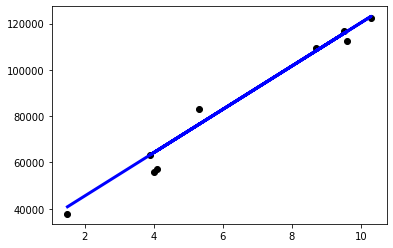

In [68]:
plt.scatter(X_test, Y_test,  color='black')
plt.plot(X_test, Y_pred, color='blue', linewidth=3)

# Logistic Regression
classification problem

##
The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

In [3]:
data = pd.read_csv('Data_Science\creditcard.csv')

In [20]:
data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [21]:
X = data.iloc[:,:-2] # wszystkie wiersze a kolumny do przed-przedostatniej
Y = data['Class']
Y.value_counts()
print(len(Y))
print(len(X))

284807
284807


In [22]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20)

In [24]:
X.shape

(284807, 29)

In [25]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

### Modelowanie

In [26]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, Y_train)

Y_predicted = model.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_predicted)

0.9993328885923949

In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, Y_predicted)

array([[56864,     5],
       [   33,    60]], dtype=int64)

### handling unbalanced classes

In [29]:
balanced = LogisticRegression(random_state=0, class_weight='balanced')
balanced.fit(X_train, Y_train)
Y_predicted = balanced.predict(X_test)
accuracy_score(Y_test, Y_predicted)

0.9777395456620203

In [30]:
confusion_matrix(Y_test, Y_predicted)

array([[55610,  1259],
       [    9,    84]], dtype=int64)